In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

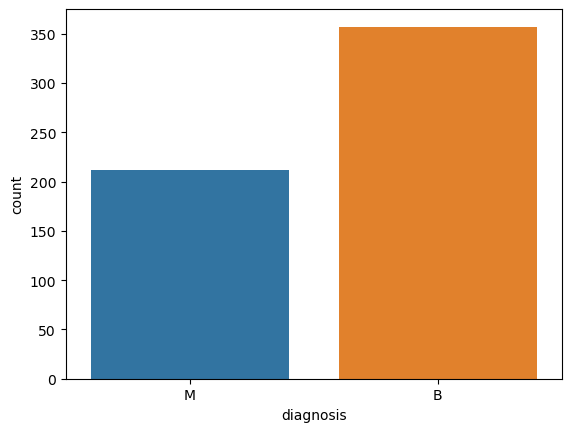

In [7]:
sns.countplot(x='diagnosis',data=df)

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
x = df.drop('diagnosis',axis=1)

In [10]:
y = df[['diagnosis']]

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [12]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [13]:
ytest.shape

(171, 1)

In [14]:
xtest.shape

(171, 30)

# Apply Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()

In [17]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [18]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [19]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [20]:
pred # Predicted value of Y

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [21]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
      

In [22]:
dt.score(xtest,ytest)

0.9122807017543859

# Evaluate the ML model

In [23]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [24]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           B       0.95      0.91      0.93       108\n           M       0.85      0.92      0.89        63\n\n    accuracy                           0.91       171\n   macro avg       0.90      0.91      0.91       171\nweighted avg       0.92      0.91      0.91       171\n'

In [25]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           B       0.95      0.91      0.93       108
           M       0.85      0.92      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.92      0.91      0.91       171



In [26]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [27]:
test_confusion_matrix

array([[98, 10],
       [ 5, 58]], dtype=int64)

<AxesSubplot:>

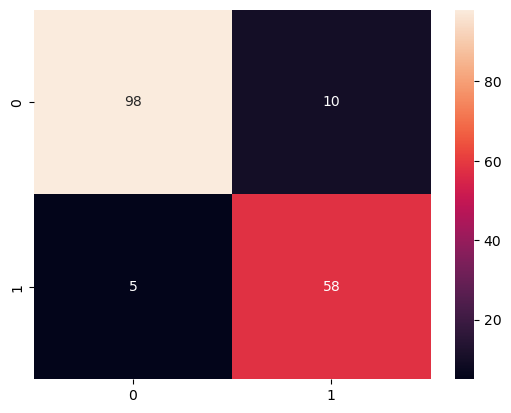

In [28]:
sns.heatmap(test_confusion_matrix, annot=True)

In [29]:
tp, fp, fn, tn = confusion_matrix(ytest,pred).reshape(-1)

In [30]:
dt.score(xtest,ytest)

0.9122807017543859

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier() # default parameters, 100 Tree = n_estimators=100

In [33]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [34]:
clf.score(xtest, ytest)

0.9707602339181286

# Some dataset for practice

In [35]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
#https://scikit-learn.org/stable/datasets/real_world.html

# Hyper Parameter Tuning

In [36]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.RandomizedSearchCV.html

# Randomized Search CV

In [37]:
# creating param_distributions for random forest
import numpy as np
trees = np.random.randint(15,150,30) # will generate 30 values in range of 15-150

In [38]:
trees

array([ 74,  92,  39, 130, 115, 105,  24,  45,  21,  52, 147,  38,  42,
        21,  97, 104,  68,  80, 140, 137, 140,  22, 143,  45,  30,  84,
        75, 118,  69, 116])

In [39]:
from scipy.stats import randint

grids = {
    'n_estimators' : trees,
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini','entropy'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [40]:
print(grids)

{'n_estimators': array([ 74,  92,  39, 130, 115, 105,  24,  45,  21,  52, 147,  38,  42,
        21,  97, 104,  68,  80, 140, 137, 140,  22, 143,  45,  30,  84,
        75, 118,  69, 116]), 'max_features': ['sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AE96763C40>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AE971BE130>}


In [41]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [42]:
rcv = RandomizedSearchCV(clf, grids, n_iter=200, cv=3)

In [43]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AE971BE130>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002AE96763C40>,
                                        'n_estimators': array([ 74,  92,  39, 130, 115, 105,  24,  45,  21,  52, 147,  38,  42,
        21,  97, 104,  68,  80, 140, 137, 140,  22, 143,  45,  30,  84,
        75, 118,  69, 116])})

In [44]:
rcv.cv_results_

{'mean_fit_time': array([0.01817203, 0.0249149 , 0.06884654, 0.0743951 , 0.04457959,
        0.04095189, 0.06550543, 0.07436379, 0.03726482, 0.07421684,
        0.08601729, 0.0343291 , 0.05830042, 0.03605882, 0.09769169,
        0.05895082, 0.03132153, 0.05759645, 0.03208518, 0.06134216,
        0.05496891, 0.1049482 , 0.10852202, 0.01987616, 0.04359444,
        0.05173969, 0.05647961, 0.11753154, 0.01771537, 0.08648976,
        0.02322682, 0.05614511, 0.01871562, 0.08705854, 0.02021893,
        0.0315814 , 0.08452447, 0.11061184, 0.08873272, 0.05803752,
        0.1179537 , 0.02991962, 0.10947053, 0.08094962, 0.10943166,
        0.10904249, 0.11555958, 0.02915716, 0.05263615, 0.10820174,
        0.09748308, 0.12131214, 0.10011498, 0.01921701, 0.05742939,
        0.03189143, 0.11295112, 0.03456529, 0.03659654, 0.06348594,
        0.12150884, 0.03124889, 0.07875403, 0.01998289, 0.03507948,
        0.10659051, 0.11102764, 0.07325562, 0.0181218 , 0.03065403,
        0.03023855, 0.08682354,

In [45]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [46]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018172,0.000972,0.002338,4.706398e-04,gini,5,log2,3,5,21,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.924812,0.962406,0.954545,0.947254,0.016190,16
1,0.024915,0.000223,0.003008,1.123916e-07,entropy,3,log2,8,6,30,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.917293,0.962406,0.962121,0.947273,0.021200,15
2,0.068847,0.001934,0.006015,5.150430e-07,gini,None,log2,9,14,92,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.917293,0.947368,0.939394,0.934685,0.012722,150
3,0.074395,0.001982,0.006051,5.012665e-05,gini,4,sqrt,1,8,92,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.924812,0.977444,0.946970,0.949742,0.021576,10
4,0.044580,0.000574,0.003673,4.708094e-04,entropy,5,sqrt,5,18,52,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.917293,0.954887,0.939394,0.937191,0.015426,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.029512,0.000454,0.003497,5.071923e-04,gini,3,log2,5,8,39,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.932331,0.962406,0.946970,0.947236,0.012280,19
196,0.034945,0.000182,0.004025,2.610463e-05,gini,5,sqrt,8,17,45,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.932331,0.932331,0.954545,0.939736,0.010472,85
197,0.051312,0.001457,0.005071,8.822969e-05,gini,4,log2,9,14,68,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.932331,0.962406,0.939394,0.944710,0.012841,47
198,0.071555,0.000636,0.006016,1.123916e-07,gini,4,sqrt,4,19,92,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.932331,0.939850,0.939394,0.937191,0.003442,120


In [47]:
rcv.best_score_

0.9622731070099491

In [48]:
rcv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 30}

In [49]:
clf2 = rcv.best_estimator_

In [50]:
clf2.fit(xtrain, ytrain) # training again

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=4, n_estimators=30)

In [51]:
clf2.score(xtest, ytest)

0.9707602339181286

# Post-Pruning

In [52]:
# Define the random forest classifier with ccp_alpha parameter
rfc = DecisionTreeClassifier(ccp_alpha=0.0)

# Define the parameter grid for GridSearchCV
param_grid = {'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

# Print the best parameter values and the corresponding accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

print("Test Score: ", grid_search.score(xtest, ytest))


Best Parameters:  {'ccp_alpha': 0.01}
Best Score:  0.9297151898734176
Test Score:  0.9649122807017544
